# Laboratorio 4.2: Clustering II


**Fecha:** Octubre 2023

## ============= Declaración de compromiso ético =============

Nosotros ****MARTÍN BRAVO, FELIPE AVENDAÑO**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 3) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

Para este lab trabajaremos con un dataset de vino y haremos clustering sobre el.

In [43]:
from sklearn.cluster import DBSCAN
import pandas as pd

dataframe = pd.read_csv("data.csv")
X = pd.DataFrame(dataframe)
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Visualizar los datos
Aplique PCA sobre los datos para reducirlos a solo dos dimensiones. Visualice los datos mediante un scatterplot.
Responda brevemente:
- ¿Qué puede decir de los datos?
- ¿Cuantos clusters cree que hay?
- ¿Qué algoritmo de clustering podría funcionar mejor?

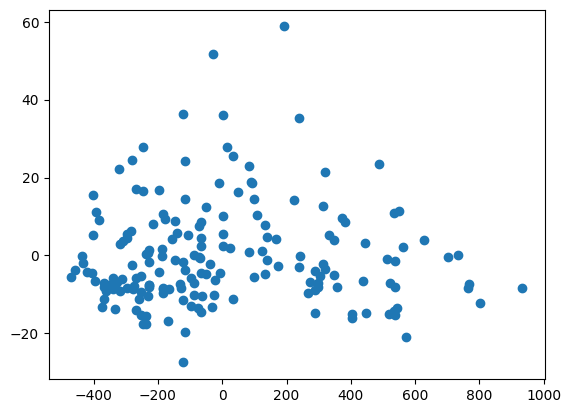

In [44]:
# Aplicamos PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

# Transformamos los datos
X_pca = pca.transform(X)

# Visualizamos los datos con scatterplot
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

*Respuesta*

- Hay una amalgama de datos, no se puede distinguir una separación clara entre ellos.

- Creemos que hay 2 clusters

- Creemos que K-means ya que es un algoritmo que detecta bien las hiperesferas.

## K-Means
Ahora compararemos Dos algoritmos de clustering con los datos. Partiremos con K-means


**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente el método del codo. ¿Cuántos clusters propone usar para este dataset? Escoja dos opciones y justifique su elección.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

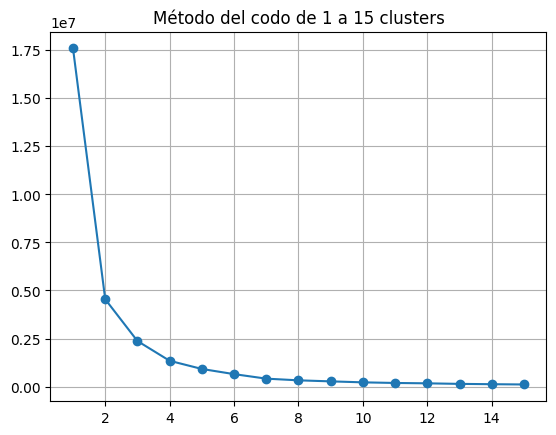

In [45]:


# Método del codo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sse = []

for k in range(1,16):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,16), sse, marker="o") 
plt.title("Método del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

*Respuesta*

El método del codo nos susgiere que usemos 2-4 clusters

**2.** Genere un gráfico para cada uno de los dos `k` elegidos para tener una representación visual de los clusters. (usando los datos reducidos)

## Clustering Jerárquico

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


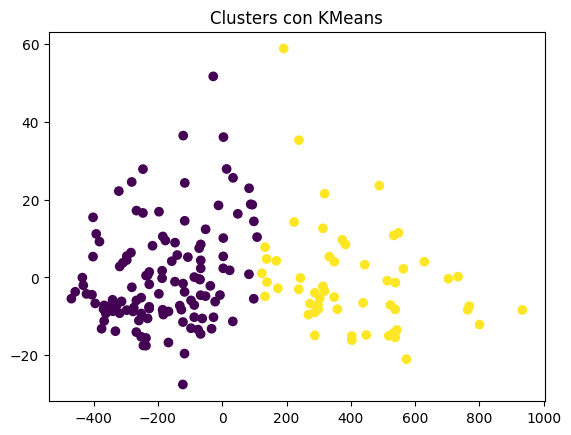

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


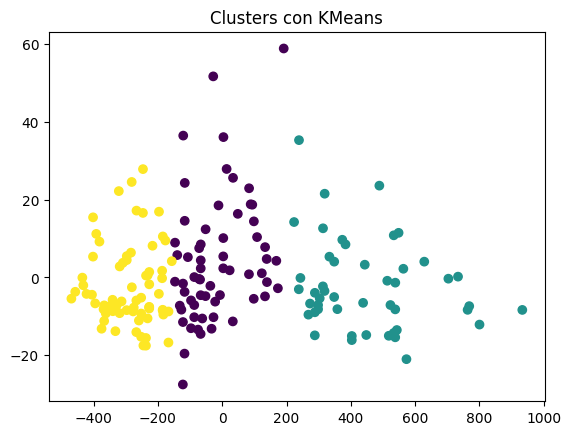

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


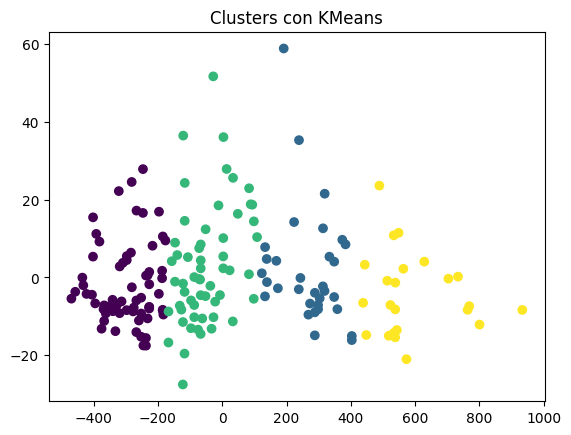

In [46]:
for i in range(2,5):
    kmeans = KMeans(n_clusters=i).fit(X)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
    plt.title("Clusters con KMeans")
    plt.show()

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, utilizando la metrica de distancia por defecto y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser gráficos separados (individuales).

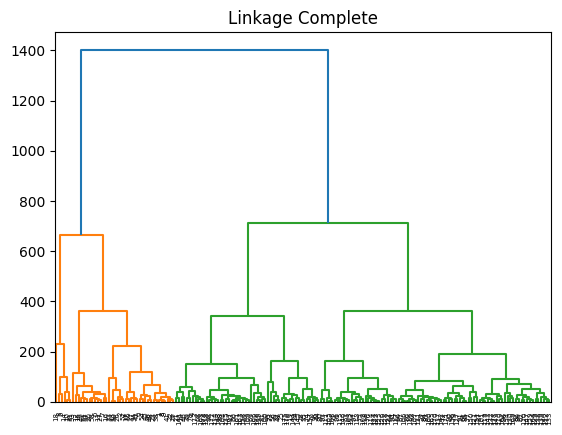

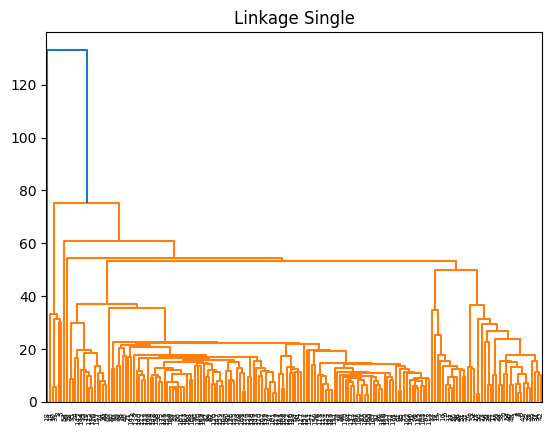

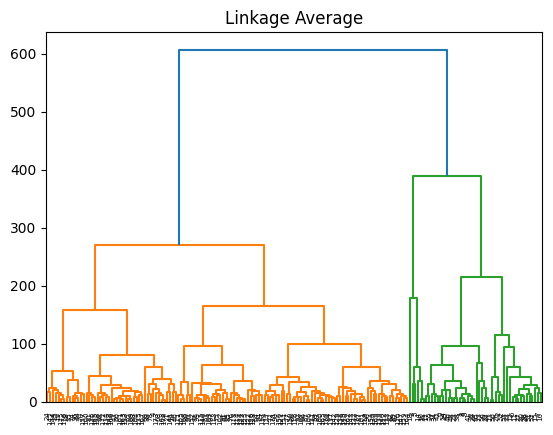

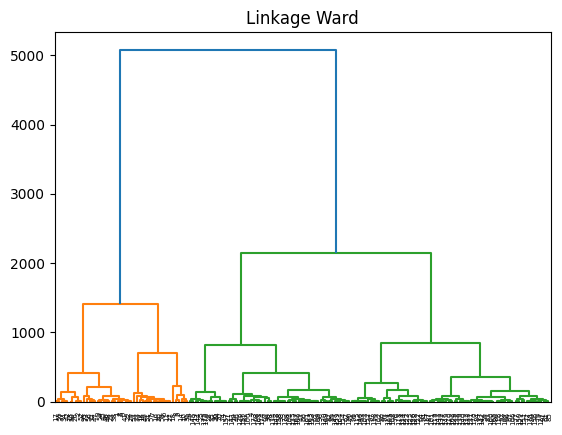

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")
               
dendrogram(complete)
plt.title("Linkage Complete")
plt.show()

dendrogram(single)
plt.title("Linkage Single")
plt.show()

dendrogram(average)
plt.title("Linkage Average")
plt.show()

dendrogram(ward)
plt.title("Linkage Ward")
plt.show()



**2.** Fijándose en el método `complete`, ¿"visualmente" cuántos clusters propone usar? ¿A qué altura recomendaría cortar el árbol?

*Respuesta*

Proponemos usar 3 clusters y cortar el árbol a una altura de 4


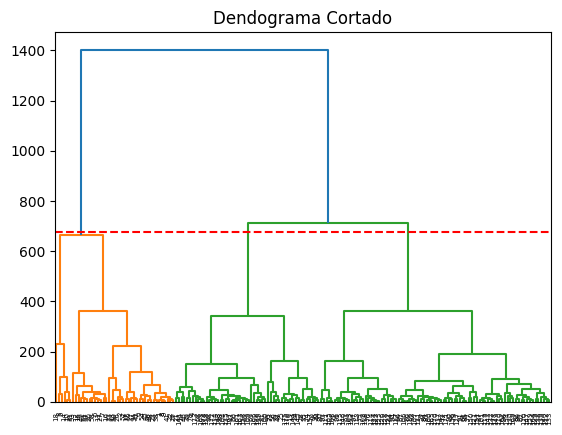

In [49]:
cortado = 675

dendrogram(complete)
plt.title('Dendograma Cortado')
plt.axhline(y=cortado, color='r', linestyle='--')
plt.show()

**3.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta anterior y liste la asignación de clusters para cada registro del dataset usando el método `complete`. Señale cuántos clusters se generan cortando la altura que propuso en la pregunta anterior. Luego, usando el dataset con dimensiones reducidas generado en la parte K-means (`new_X`), grafique los datos y píntelos con su asignacion de clusters según el métodos `complete` para tener una representación visual de los clusters.

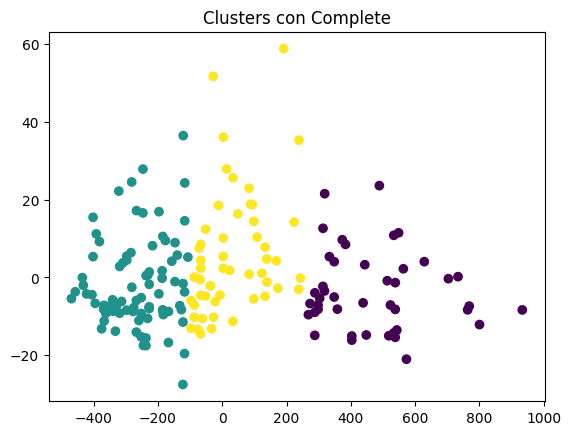

In [51]:
complete_all = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=cortado).fit(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=complete_all.labels_)
plt.title("Clusters con Complete")
plt.show()


## DBSCAN

Ahora probaremos hacer el clustering con el método DBSCAN.


**1.** Estime el valor `eps` usando el método de la rodilla (basado en KNN). La idea de este procedimiento es calcular la distancia promedio de cada punto a sus `k` vecinos más cercanos los cuales son graficados en orden ascendente. El objetivo es determinar la _rodilla_, que corresponde al valor óptimo de `eps`. Pruebe varios valores de `y` utilizando el siguiente código y adjunte el gráfico para el mejor `y` que usted considere. Explique porque escogio el valor `y` como mejor opción. Luego ejecute y grafique los clusters usando el método DBSCAN haciendo uso de parámetro `eps` (`y`) encontrado previamente. ¿Cuántos clusters se encontraron?

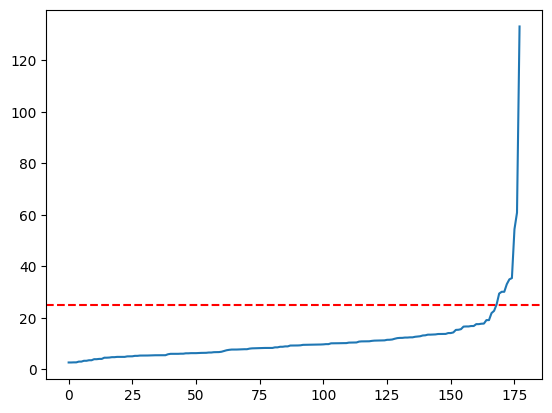

In [59]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=25, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances)

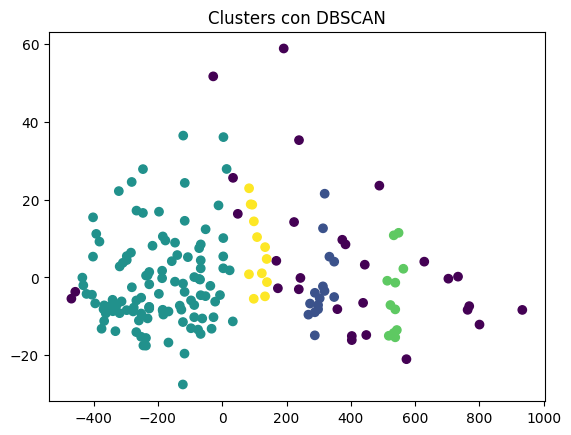

In [58]:
dbscan = DBSCAN(eps=25, min_samples=5).fit(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)
plt.title("Clusters con DBSCAN")
plt.show()

## Evaluación

**1.** Para evaluar clusters existen una serie de métodos y métricas. En esta parte usaremos el coeficiente de Silhouette. Para cada uno de los experimentos (los dos de la parte de `kmeans`, el con el método `complete` en la parte de clustering jerárquico y el con `DBSCAN`), adjunte el código que permita obtener el Silhouette score de los modelos. En base a los valores obtenidos para cada método y configuración. ¿Cuál cree que es el que tiene mejor resultado? Comente al respecto basándose principalmente en los resultados.

>Respuesta

**2.** Ahora compararemos los métodos usando matrices de similitud, para esto ejecute el código de la siguiente celda y complete las que vienen.
Comente acerca de las matrices generadas, ¿Cuál estaría generando un mejor clustering?


In [60]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np


def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    dist = sim_matrix(data, model.labels_)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

In [ ]:

plot(X_pca, dbscan)

In [ ]:

plot(X_pca, )

In [ ]:

plot(X_pca, )

In [ ]:

plot(X_pca, )

**3.** Luego de haber usado dos métodos de evaluación, responda brevemente:
- ¿Dan resultados similiares en cuanto a la calidad de los cluster con los 3 métodos?
- ¿Los resultados obtenidos son consistentes con sus predicciones hechas en la primera parte antes de realizar el clustering?

*Respuesta*